In [1]:
import os
os.chdir('/Users/joncreative/Desktop')


In [2]:
import ssl
import nltk
import pandas as pd
import re
from nltk.corpus import stopwords
from collections import Counter
import plotly.express as px

# Disable SSL verification
ssl._create_default_https_context = ssl._create_unverified_context

# Set the NLTK data path
nltk.data.path.append('/Users/joncreative/Desktop/nltk_data')

# Ensure the stopwords are loaded from the local path
stop_words = set(stopwords.words('english'))

# Function to clean review text
def clean_review(review):
    review = review.lower()  # Convert to lowercase
    review = re.sub(r'\d+', '', review)  # Remove digits
    review = re.sub(r'\W+', ' ', review)  # Remove special characters
    review = ' '.join([word for word in review.split() if word not in stop_words])  # Remove stopwords
    return review

# List of reviews
reviews = [
    "Had a great experience working with Richard! He was able to meet my specific needs and was very personally invested in getting me into a place that I really liked. It was really nice working with a realtor who was flexible and understanding of my unique circumstances, and willing to work with them. Definitely would work with him again!",
    "One of the easiest apartment rental experiences I have had in my 8 years being in NYC. It took three days from seeing the apartment to signing the lease! Thanks Pear!!",
    "We've had a great experience with Richard form Pear NYC. He was friendly and professional, and the process was very straightforward and low-stress. Thanks Richard!",
    "I have been working at Pear NYC for the past year, and I must say that it has been a rewarding experience. The company culture is inclusive, and the team I work with is incredibly supportive.",
    "Richard is an exceptional realtor who made our move in NYC a breeze! In a city known for its hectic and impersonal real estate scene, Richard stood out with his responsiveness and personable approach. We found our dream apartment and it’s all thanks to him and Pear’s incredible team! Highly, highly, HIIIGHLY recommend!!!",
    "Just rented an apartment in Bushwick with Pear NYC and it’s been heaven! Pear made it so easy and simple so I would definitely recommend it for anyone struggling. Also huge thanks to Jair and Richard! Always answering and helping with all of the issues possible. If you are with them, you are in good hands for certain.",
    "I had an excellent experience with Pear NYC. The team was responsive, attentive, and made the entire renting process smooth and stress-free. Highly recommend!👍",
    "I was in an apartment search for months that was actually miserable. I cannot recommend enough just contacting Pear and going from there. I was about to give up when Jair responded to my email. I was able to get an apartment secured within a week.",
    "Thanks to Robert. He helped us to get the place we want. He goes above and beyond to meet your requirements and helps you every possible way. He responds to every question and clarify things. I would recommend Robert 100%. If you are looking for a place.",
    "I had an excellent experience working with Robert to find my next apartment in Brooklyn. He is a great communicator and tirelessly showed my picky self multiple apartments until I found the one I could call home. Highly recommend working with him & the team!",
    "RICHARD FOR THE WIN! My husband and I had the recent pleasure of meeting and working with Richard. From start to finish, he was exceptionally helpful and pleasant to work with. As natives to the neighborhood we were looking to move within, he provided us with invaluable insights.",
    "I am very thankful for Rob and all of his support! He is patient, efficient and went above and beyond throughout the whole process. When one of the spots we were originally looking at got taken, he helped find us an even better crib within our budget.",
    "We had a very good experience with Robert from Pear NYC! With his help, we were able to find the right home swiftly and with great care. He was responsive, considerate, and was great to work with. I would recommend him and this brokerage again!",
    "Speedy, clear responses from the realtor but after one month of living at the property, I realize the realtor lied about some details of the property and the property management is horrible when I was led to believe they would be responsible and responsive.",
    "The whole process of getting my apartment was made very quick and simple and Jair was super helpful and answered any questions I had right away. :)",
]

# Create a DataFrame
df = pd.DataFrame(reviews, columns=['Review'])

# Clean the reviews
df['Cleaned_Review'] = df['Review'].apply(clean_review)

# Keyword frequency analysis
all_words = ' '.join(df['Cleaned_Review']).split()
word_freq = Counter(all_words)
common_words = word_freq.most_common(10)

# Create keyword frequency DataFrame
keyword_df = pd.DataFrame(common_words, columns=['Keyword', 'Frequency'])

# Plot keyword frequency using Plotly
fig = px.bar(keyword_df, x='Keyword', y='Frequency', title='Top 10 Keyword Frequency')
fig.show()


ModuleNotFoundError: No module named 'plotly'

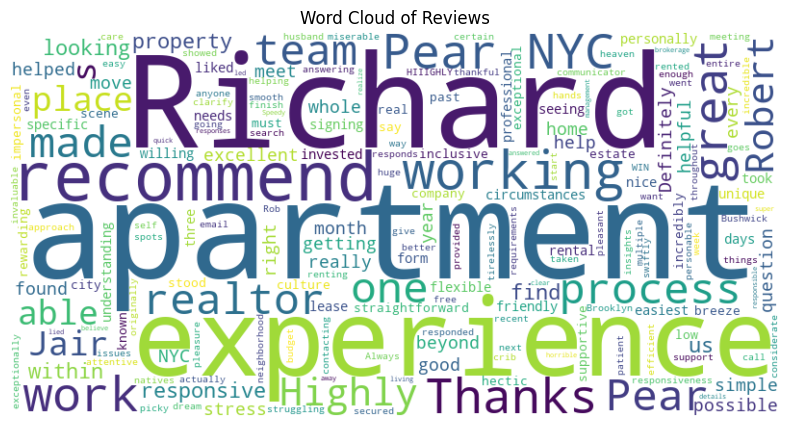

In [ ]:
# Install necessary libraries
!pip3 install wordcloud
!pip3 install plotly

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px

# Sample data for testing
data = {
    "Review": [
        "Had a great experience working with Richard! He was able to meet my specific needs and was very personally invested in getting me into a place that I really liked. It was really nice working with a realtor who was flexible and understanding of my unique circumstances, and willing to work with them. Definitely would work with him again!",
        "One of the easiest apartment rental experiences I have had in my 8 years being in NYC. It took three days from seeing the apartment to signing the lease! Thanks Pear!!",
        "We've had a great experience with Richard form Pear NYC. He was friendly and professional, and the process was very straightforward and low-stress. Thanks Richard!",
        "I have been working at Pear NYC for the past year, and I must say that it has been a rewarding experience. The company culture is inclusive, and the team I work with is incredibly supportive.",
        "Richard is an exceptional realtor who made our move in NYC a breeze! In a city known for its hectic and impersonal real estate scene, Richard stood out with his responsiveness and personable approach. We found our dream apartment and it’s all thanks to him and Pear’s incredible team! Highly, highly, HIIIGHLY recommend!!!",
        "Just rented an apartment in Bushwick with Pear NYC and it’s been heaven! Pear made it so easy and simple so I would definitely recommend it for anyone struggling. Also huge thanks to Jair and Richard! Always answering and helping with all of the issues possible. If you are with them, you are in good hands for certain.",
        "I had an excellent experience with Pear NYC. The team was responsive, attentive, and made the entire renting process smooth and stress-free. Highly recommend!👍",
        "I was in an apartment search for months that was actually miserable. I cannot recommend enough just contacting Pear and going from there. I was about to give up when Jair responded to my email. I was able to get an apartment secured within a week.",
        "Thanks to Robert. He helped us to get the place we want. He goes above and beyond to meet your requirements and helps you every possible way. He responds to every question and clarify things. I would recommend Robert 100%. If you are looking for a place.",
        "I had an excellent experience working with Robert to find my next apartment in Brooklyn. He is a great communicator and tirelessly showed my picky self multiple apartments until I found the one I could call home. Highly recommend working with him & the team!",
        "RICHARD FOR THE WIN! My husband and I had the recent pleasure of meeting and working with Richard. From start to finish, he was exceptionally helpful and pleasant to work with. As natives to the neighborhood we were looking to move within, he provided us with invaluable insights.",
        "I am very thankful for Rob and all of his support! He is patient, efficient and went above and beyond throughout the whole process. When one of the spots we were originally looking at got taken, he helped find us an even better crib within our budget.",
        "We had a very good experience with Robert from Pear NYC! With his help, we were able to find the right home swiftly and with great care. He was responsive, considerate, and was great to work with. I would recommend him and this brokerage again!",
        "Speedy, clear responses from the realtor but after one month of living at the property, I realize the realtor lied about some details of the property and the property management is horrible when I was led to believe they would be responsible and responsive.",
        "The whole process of getting my apartment was made very quick and simple and Jair was super helpful and answered any questions I had right away. :)"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Generate the word cloud
text = ' '.join(df['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()

# Save the word cloud image to display in Plotly
wordcloud.to_file('wordcloud.png')

# Display the word cloud using Plotly
fig = px.imshow(plt.imread('wordcloud.png'))
fig.update_layout(title='Word Cloud of Reviews', xaxis={'visible': False}, yaxis={'visible': False})
fig.show()


In [ ]:
import plotly.express as px
from textblob import TextBlob
import pandas as pd

# Sample data with dates (make sure to include dates in your actual data)
data = {
    "Date": pd.date_range(start="2023-01-01", periods=15, freq='M'),
    "Review": [
        "Had a great experience working with Richard! ...",
        "One of the easiest apartment rental experiences ...",
        "We've had a great experience with Richard from Pear NYC ...",
        "I have been working at Pear NYC for the past year ...",
        "Richard is an exceptional realtor who made our move ...",
        "Just rented an apartment in Bushwick with Pear NYC ...",
        "I had an excellent experience with Pear NYC ...",
        "I was in an apartment search for months that was ...",
        "Thanks to Robert. He helped us to get the place we want ...",
        "I had an excellent experience working with Robert ...",
        "RICHARD FOR THE WIN! My husband and I had the recent ...",
        "I am very thankful for Rob and all of his support ...",
        "We had a very good experience with Robert from Pear NYC ...",
        "Speedy, clear responses from the realtor but after one month ...",
        "The whole process of getting my apartment was made very quick ..."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Perform sentiment analysis
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment over time
fig = px.line(df, x='Date', y='Sentiment', title='Sentiment Over Time')
fig.show()


/var/folders/hg/jqkkc7y90xj97kd8k1br6bv40000gn/T/ipykernel_23646/887581170.py:7: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [ ]:
from collections import Counter
import plotly.graph_objects as go

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['Sentiment'] > 0]['Review'])
negative_reviews = ' '.join(df[df['Sentiment'] < 0]['Review'])

# Get word frequencies
positive_word_freq = Counter(positive_reviews.split())
negative_word_freq = Counter(negative_reviews.split())

# Convert to DataFrame
positive_df = pd.DataFrame(positive_word_freq.items(), columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(negative_word_freq.items(), columns=['Word', 'Frequency'])

# Filter common words for visualization
common_positive_words = positive_df.nlargest(10, 'Frequency')
common_negative_words = negative_df.nlargest(10, 'Frequency')

# Plot the word frequencies
fig = go.Figure()
fig.add_trace(go.Bar(x=common_positive_words['Word'], y=common_positive_words['Frequency'], name='Positive Reviews', marker_color='green'))
fig.add_trace(go.Bar(x=common_negative_words['Word'], y=common_negative_words['Frequency'], name='Negative Reviews', marker_color='red'))

fig.update_layout(barmode='group', title='Word Frequency by Sentiment')
fig.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joncreative/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/joncreative/nltk_data...


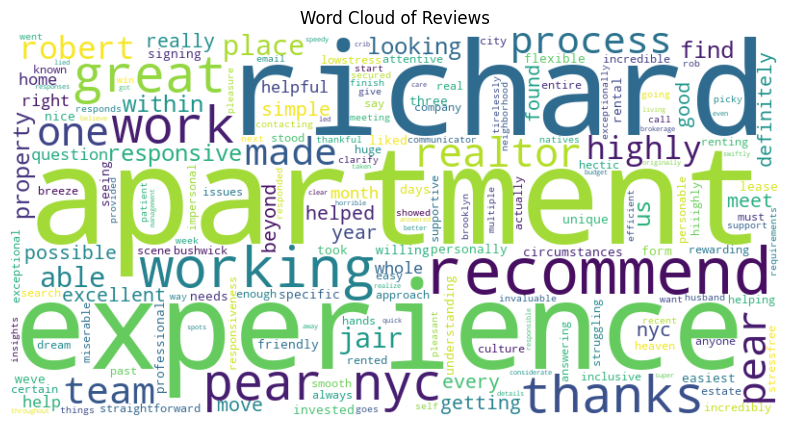

In [1]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download necessary NLTK data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('stopwords')
nltk.download('vader_lexicon')

# Sample data (15 reviews)
reviews = [
    "Had a great experience working with Richard! He was able to meet my specific needs and was very personally invested in getting me into a place that I really liked. It was really nice working with a realtor who was flexible and understanding of my unique circumstances, and willing to work with them. Definitely would work with him again!",
    "One of the easiest apartment rental experiences I have had in my 8 years being in NYC. It took three days from seeing the apartment to signing the lease! Thanks Pear!!",
    "We've had a great experience with Richard form Pear NYC. He was friendly and professional, and the process was very straightforward and low-stress. Thanks Richard!",
    "I have been working at Pear NYC for the past year, and I must say that it has been a rewarding experience. The company culture is inclusive, and the team I work with is incredibly supportive.",
    "Richard is an exceptional realtor who made our move in NYC a breeze! In a city known for its hectic and impersonal real estate scene, Richard stood out with his responsiveness and personable approach. We found our dream apartment and it’s all thanks to him and Pear’s incredible team! Highly, highly, HIIIGHLY recommend!!!",
    "Just rented an apartment in Bushwick with Pear NYC and it’s been heaven! Pear made it so easy and simple so I would definitely recommend it for anyone struggling. Also huge thanks to Jair and Richard! Always answering and helping with all of the issues possible. If you are with them, you are in good hands for certain.",
    "I had an excellent experience with Pear NYC. The team was responsive, attentive, and made the entire renting process smooth and stress-free. Highly recommend!👍",
    "I was in an apartment search for months that was actually miserable. I cannot recommend enough just contacting Pear and going from there. I was about to give up when Jair responded to my email. I was able to get an apartment secured within a week.",
    "Thanks to Robert. He helped us to get the place we want. He goes above and beyond to meet your requirements and helps you every possible way. He responds to every question and clarify things. I would recommend Robert 100%. If you are looking for a place.",
    "I had an excellent experience working with Robert to find my next apartment in Brooklyn. He is a great communicator and tirelessly showed my picky self multiple apartments until I found the one I could call home. Highly recommend working with him & the team!",
    "RICHARD FOR THE WIN! My husband and I had the recent pleasure of meeting and working with Richard. From start to finish, he was exceptionally helpful and pleasant to work with. As natives to the neighborhood we were looking to move within, he provided us with invaluable insights.",
    "I am very thankful for Rob and all of his support! He is patient, efficient and went above and beyond throughout the whole process. When one of the spots we were originally looking at got taken, he helped find us an even better crib within our budget.",
    "We had a very good experience with Robert from Pear NYC! With his help, we were able to find the right home swiftly and with great care. He was responsive, considerate, and was great to work with. I would recommend him and this brokerage again!",
    "Speedy, clear responses from the realtor but after one month of living at the property, I realize the realtor lied about some details of the property and the property management is horrible when I was led to believe they would be responsible and responsive.",
    "The whole process of getting my apartment was made very quick and simple and Jair was super helpful and answered any questions I had right away. :)"
]

# Create a DataFrame
df = pd.DataFrame({'Review': reviews})

# Clean the reviews
stop_words = set(stopwords.words('english'))
def clean_review(review):
    review = review.lower()
    review = pd.Series(review).replace(r'[^\w\s]', '', regex=True)[0]  # Use raw string for regex
    review = " ".join([word for word in review.split() if word not in stop_words])
    return review

df['Cleaned_Review'] = df['Review'].apply(clean_review)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['Cleaned_Review']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.savefig('wordcloud.png')
plt.show()


In [2]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download necessary NLTK data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('stopwords')

# Sample data (15 reviews)
reviews = [
    "Had a great experience working with Richard! He was able to meet my specific needs and was very personally invested in getting me into a place that I really liked. It was really nice working with a realtor who was flexible and understanding of my unique circumstances, and willing to work with them. Definitely would work with him again!",
    "One of the easiest apartment rental experiences I have had in my 8 years being in NYC. It took three days from seeing the apartment to signing the lease! Thanks Pear!!",
    "We've had a great experience with Richard form Pear NYC. He was friendly and professional, and the process was very straightforward and low-stress. Thanks Richard!",
    "I have been working at Pear NYC for the past year, and I must say that it has been a rewarding experience. The company culture is inclusive, and the team I work with is incredibly supportive.",
    "Richard is an exceptional realtor who made our move in NYC a breeze! In a city known for its hectic and impersonal real estate scene, Richard stood out with his responsiveness and personable approach. We found our dream apartment and it’s all thanks to him and Pear’s incredible team! Highly, highly, HIIIGHLY recommend!!!",
    "Just rented an apartment in Bushwick with Pear NYC and it’s been heaven! Pear made it so easy and simple so I would definitely recommend it for anyone struggling. Also huge thanks to Jair and Richard! Always answering and helping with all of the issues possible. If you are with them, you are in good hands for certain.",
    "I had an excellent experience with Pear NYC. The team was responsive, attentive, and made the entire renting process smooth and stress-free. Highly recommend!👍",
    "I was in an apartment search for months that was actually miserable. I cannot recommend enough just contacting Pear and going from there. I was about to give up when Jair responded to my email. I was able to get an apartment secured within a week.",
    "Thanks to Robert. He helped us to get the place we want. He goes above and beyond to meet your requirements and helps you every possible way. He responds to every question and clarify things. I would recommend Robert 100%. If you are looking for a place.",
    "I had an excellent experience working with Robert to find my next apartment in Brooklyn. He is a great communicator and tirelessly showed my picky self multiple apartments until I found the one I could call home. Highly recommend working with him & the team!",
    "RICHARD FOR THE WIN! My husband and I had the recent pleasure of meeting and working with Richard. From start to finish, he was exceptionally helpful and pleasant to work with. As natives to the neighborhood we were looking to move within, he provided us with invaluable insights.",
    "I am very thankful for Rob and all of his support! He is patient, efficient and went above and beyond throughout the whole process. When one of the spots we were originally looking at got taken, he helped find us an even better crib within our budget.",
    "We had a very good experience with Robert from Pear NYC! With his help, we were able to find the right home swiftly and with great care. He was responsive, considerate, and was great to work with. I would recommend him and this brokerage again!",
    "Speedy, clear responses from the realtor but after one month of living at the property, I realize the realtor lied about some details of the property and the property management is horrible when I was led to believe they would be responsible and responsive.",
    "The whole process of getting my apartment was made very quick and simple and Jair was super helpful and answered any questions I had right away. :)"
]

# Create a DataFrame
df = pd.DataFrame({'Review': reviews})

# Clean the reviews
stop_words = set(stopwords.words('english'))
def clean_review(review):
    review = review.lower()
    review = pd.Series(review).replace(r'[^\w\s]', '', regex=True)[0]  # Use raw string for regex
    review = " ".join([word for word in review.split() if word not in stop_words])
    return review

df['Cleaned_Review'] = df['Review'].apply(clean_review)

# Generate word frequencies
all_words = ' '.join(df['Cleaned_Review']).split()
word_freq = Counter(all_words)

# Prepare data for Plotly scatter plot
words = list(word_freq.keys())
freqs = list(word_freq.values())

# Create a DataFrame for the word frequencies
word_freq_df = pd.DataFrame({'Word': words, 'Frequency': freqs})

# Create a scatter plot with Plotly
fig = px.scatter(word_freq_df, x='Word', y='Frequency', size='Frequency', text='Word', 
                 title='Word Cloud (Interactive)', labels={'Frequency': 'Word Frequency'},
                 template='plotly_white')

fig.update_traces(textposition='top center')

# Save the interactive plot as an HTML file
fig.write_html("wordcloud_interactive.html")

# Display the figure
fig.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/joncreative/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
pip install streamlit pandas plotly wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 17.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 857.8/857.8 kB 17.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.2/394.2 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.0/26.0 MB 19.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 18.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.7/240.7 kB 10.2 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.5/87.5 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 6.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import plotly.express as px
from textblob import TextBlob
import pandas as pd
import plotly.io as pio

# Sample data with dates (make sure to include dates in your actual data)
data = {
    "Date": pd.date_range(start="2023-01-01", periods=15, freq='M'),
    "Review": [
        "Had a great experience working with Richard! ...",
        "One of the easiest apartment rental experiences ...",
        "We've had a great experience with Richard from Pear NYC ...",
        "I have been working at Pear NYC for the past year ...",
        "Richard is an exceptional realtor who made our move ...",
        "Just rented an apartment in Bushwick with Pear NYC ...",
        "I had an excellent experience with Pear NYC ...",
        "I was in an apartment search for months that was ...",
        "Thanks to Robert. He helped us to get the place we want ...",
        "I had an excellent experience working with Robert ...",
        "RICHARD FOR THE WIN! My husband and I had the recent ...",
        "I am very thankful for Rob and all of his support ...",
        "We had a very good experience with Robert from Pear NYC ...",
        "Speedy, clear responses from the realtor but after one month ...",
        "The whole process of getting my apartment was made very quick ..."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Perform sentiment analysis
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Plot sentiment over time
fig = px.line(df, x='Date', y='Sentiment', title='Sentiment Over Time')

# Save the figure to an HTML file
pio.write_html(fig, file='sentiment_over_time.html', auto_open=True)


/var/folders/hg/jqkkc7y90xj97kd8k1br6bv40000gn/T/ipykernel_25884/1980021439.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Date": pd.date_range(start="2023-01-01", periods=15, freq='M'),


In [2]:
from collections import Counter
import plotly.graph_objects as go
import plotly.io as pio
import pandas as pd
from textblob import TextBlob

# Sample data with dates (make sure to include dates in your actual data)
data = {
    "Date": pd.date_range(start="2023-01-01", periods=15, freq='M'),
    "Review": [
        "Had a great experience working with Richard! ...",
        "One of the easiest apartment rental experiences ...",
        "We've had a great experience with Richard from Pear NYC ...",
        "I have been working at Pear NYC for the past year ...",
        "Richard is an exceptional realtor who made our move ...",
        "Just rented an apartment in Bushwick with Pear NYC ...",
        "I had an excellent experience with Pear NYC ...",
        "I was in an apartment search for months that was ...",
        "Thanks to Robert. He helped us to get the place we want ...",
        "I had an excellent experience working with Robert ...",
        "RICHARD FOR THE WIN! My husband and I had the recent ...",
        "I am very thankful for Rob and all of his support ...",
        "We had a very good experience with Robert from Pear NYC ...",
        "Speedy, clear responses from the realtor but after one month ...",
        "The whole process of getting my apartment was made very quick ..."
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Perform sentiment analysis
df['Sentiment'] = df['Review'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Separate positive and negative reviews
positive_reviews = ' '.join(df[df['Sentiment'] > 0]['Review'])
negative_reviews = ' '.join(df[df['Sentiment'] < 0]['Review'])

# Get word frequencies
positive_word_freq = Counter(positive_reviews.split())
negative_word_freq = Counter(negative_reviews.split())

# Convert to DataFrame
positive_df = pd.DataFrame(positive_word_freq.items(), columns=['Word', 'Frequency'])
negative_df = pd.DataFrame(negative_word_freq.items(), columns=['Word', 'Frequency'])

# Filter common words for visualization
common_positive_words = positive_df.nlargest(10, 'Frequency')
common_negative_words = negative_df.nlargest(10, 'Frequency')

# Plot the word frequencies
fig = go.Figure()
fig.add_trace(go.Bar(x=common_positive_words['Word'], y=common_positive_words['Frequency'], name='Positive Reviews', marker_color='green'))
fig.add_trace(go.Bar(x=common_negative_words['Word'], y=common_negative_words['Frequency'], name='Negative Reviews', marker_color='red'))

fig.update_layout(barmode='group', title='Word Frequency by Sentiment')

# Save the figure to an HTML file
pio.write_html(fig, file='word_frequency_by_sentiment.html', auto_open=True)


/var/folders/hg/jqkkc7y90xj97kd8k1br6bv40000gn/T/ipykernel_25884/1517910454.py:9: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [3]:
# Install necessary libraries
!pip3 install wordcloud
!pip3 install plotly

import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

# Sample data for testing
data = {
    "Review": [
        "Had a great experience working with Richard! He was able to meet my specific needs and was very personally invested in getting me into a place that I really liked. It was really nice working with a realtor who was flexible and understanding of my unique circumstances, and willing to work with them. Definitely would work with him again!",
        "One of the easiest apartment rental experiences I have had in my 8 years being in NYC. It took three days from seeing the apartment to signing the lease! Thanks Pear!!",
        "We've had a great experience with Richard form Pear NYC. He was friendly and professional, and the process was very straightforward and low-stress. Thanks Richard!",
        "I have been working at Pear NYC for the past year, and I must say that it has been a rewarding experience. The company culture is inclusive, and the team I work with is incredibly supportive.",
        "Richard is an exceptional realtor who made our move in NYC a breeze! In a city known for its hectic and impersonal real estate scene, Richard stood out with his responsiveness and personable approach. We found our dream apartment and it’s all thanks to him and Pear’s incredible team! Highly, highly, HIIIGHLY recommend!!!",
        "Just rented an apartment in Bushwick with Pear NYC and it’s been heaven! Pear made it so easy and simple so I would definitely recommend it for anyone struggling. Also huge thanks to Jair and Richard! Always answering and helping with all of the issues possible. If you are with them, you are in good hands for certain.",
        "I had an excellent experience with Pear NYC. The team was responsive, attentive, and made the entire renting process smooth and stress-free. Highly recommend!👍",
        "I was in an apartment search for months that was actually miserable. I cannot recommend enough just contacting Pear and going from there. I was about to give up when Jair responded to my email. I was able to get an apartment secured within a week.",
        "Thanks to Robert. He helped us to get the place we want. He goes above and beyond to meet your requirements and helps you every possible way. He responds to every question and clarify things. I would recommend Robert 100%. If you are looking for a place.",
        "I had an excellent experience working with Robert to find my next apartment in Brooklyn. He is a great communicator and tirelessly showed my picky self multiple apartments until I found the one I could call home. Highly recommend working with him & the team!",
        "RICHARD FOR THE WIN! My husband and I had the recent pleasure of meeting and working with Richard. From start to finish, he was exceptionally helpful and pleasant to work with. As natives to the neighborhood we were looking to move within, he provided us with invaluable insights.",
        "I am very thankful for Rob and all of his support! He is patient, efficient and went above and beyond throughout the whole process. When one of the spots we were originally looking at got taken, he helped find us an even better crib within our budget.",
        "We had a very good experience with Robert from Pear NYC! With his help, we were able to find the right home swiftly and with great care. He was responsive, considerate, and was great to work with. I would recommend him and this brokerage again!",
        "Speedy, clear responses from the realtor but after one month of living at the property, I realize the realtor lied about some details of the property and the property management is horrible when I was led to believe they would be responsible and responsive.",
        "The whole process of getting my apartment was made very quick and simple and Jair was super helpful and answered any questions I had right away. :)"
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Generate the word cloud
text = ' '.join(df['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

# Save the word cloud image to display in Plotly
wordcloud.to_file('wordcloud.png')

# Display the word cloud using Plotly
fig = px.imshow(plt.imread('wordcloud.png'))
fig.update_layout(title='Word Cloud of Reviews', xaxis={'visible': False}, yaxis={'visible': False})

# Save the Plotly figure as an HTML file
pio.write_html(fig, file='wordcloud.html', auto_open=True)
